In [1]:
colab = True

In [2]:
if colab:
  from google.colab import drive
  drive.mount('/content/drive/')

  import sys
  sys.path.append('/content/drive/My\ Drive/dubuce/lab1/')
  %cd /content/drive/My\ Drive/dubuce/lab1/

Mounted at /content/drive/
/content/drive/My Drive/dubuce/lab1


In [ ]:
import data
import fcann2
import ksvm_wrap
import mnist_shootout
import pt_deep
import pt_linreg
import pt_logreg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import sklearn
from sklearn.svm import SVC
import torch
import torchvision

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

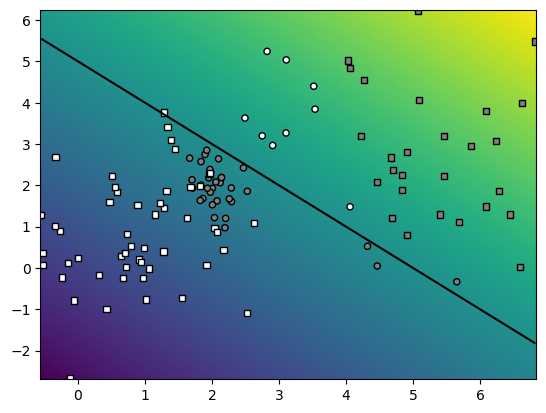

In [ ]:
K, C, N = 4, 2, 30

np.random.seed(100)

# get data
X,Y_ = data.sample_gmm_2d(K, C, N)
# X,Y_ = sample_gauss_2d(2, 100)

# get the class predictions
Y = data.myDummyDecision(X)>0.5

# graph the decision surface
rect=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(data.myDummyDecision, rect, offset=0.0)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

**2. Višeslojna klasifikacija u Pythonu (20% bodova)**

In [ ]:
K, C, N = 6, 2, 10
param_niter = 1e5
param_delta = 0.5
param_lambda = 1e-3

np.random.seed(100)

# get data
X,Y_ = data.sample_gmm_2d(K, C, N)
Yoh = data.class_to_onehot(Y_)

In [ ]:
W1, b1, W2, b2 = fcann2.fcann2_train(X, Yoh)

Epoch: 0  , loss= 0.6994825301628151
Epoch: 10000  , loss= 0.274375137203978
Epoch: 20000  , loss= 0.24860685681046638
Epoch: 30000  , loss= 0.24758451321432265
Epoch: 40000  , loss= 0.24665317466391576
Epoch: 50000  , loss= 0.24535013471564127
Epoch: 60000  , loss= 0.24446286986448015
Epoch: 70000  , loss= 0.2433073525740596
Epoch: 80000  , loss= 0.2426825997162131
Epoch: 90000  , loss= 0.24264346112795093


In [ ]:
Y = fcann2.fcann2_classify(X, W1, b1, W2, b2)

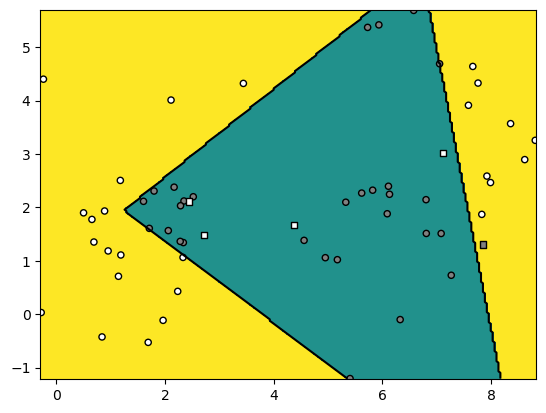

In [ ]:
fcann2_dec = fcann2.fcann2_decfun(W1, b1, W2, b2)

# graph the decision surface
rect=(np.min(X, axis=0), np.max(X, axis=0))

# graph the data points
data.graph_surface(fcann2_dec, rect, offset=0.0)
data.graph_data(X, Y_, Y)

**3. Linearna regresija u PyTorchu (10% bodova)**

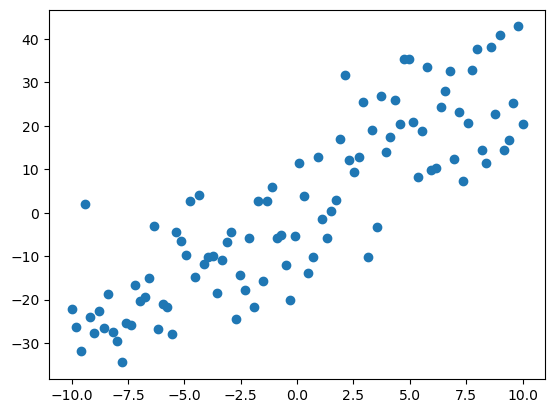

In [ ]:
# generating data for task linear regression task
N = 100
X = torch.linspace(-10, 10, steps=N)
Y = 2 * X + torch.normal(X, torch.tensor([10]))
plt.scatter(X.numpy(), Y.numpy())

Modificirajte program na način da se pravac može provući kroz proizvoljan broj točaka. Pripazite da iznosi gradijenata budu neovisni o broju podataka.

In [ ]:
# za provjeru gradijenata
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

Ispišite vrijednosti gradijenata tijekom napredovanja postupka.

In [ ]:
a, b = pt_linreg.linreg_pytorch(a, b, X, Y)

Epoch: 0, loss:237.6524200439453, Y_:tensor([-9.0000, -8.7980, -8.5960, -8.3939, -8.1919, -7.9899, -7.7879, -7.5859,
        -7.3838, -7.1818, -6.9798, -6.7778, -6.5758, -6.3737, -6.1717, -5.9697,
        -5.7677, -5.5657, -5.3636, -5.1616, -4.9596, -4.7576, -4.5556, -4.3535,
        -4.1515, -3.9495, -3.7475, -3.5455, -3.3434, -3.1414, -2.9394, -2.7374,
        -2.5354, -2.3333, -2.1313, -1.9293, -1.7273, -1.5253, -1.3232, -1.1212,
        -0.9192, -0.7172, -0.5152, -0.3131, -0.1111,  0.0909,  0.2929,  0.4949,
         0.6970,  0.8990,  1.1010,  1.3030,  1.5051,  1.7071,  1.9091,  2.1111,
         2.3131,  2.5152,  2.7172,  2.9192,  3.1212,  3.3232,  3.5253,  3.7273,
         3.9293,  4.1313,  4.3333,  4.5354,  4.7374,  4.9394,  5.1414,  5.3434,
         5.5455,  5.7475,  5.9495,  6.1515,  6.3535,  6.5556,  6.7576,  6.9596,
         7.1616,  7.3636,  7.5657,  7.7677,  7.9697,  8.1717,  8.3737,  8.5758,
         8.7778,  8.9798,  9.1818,  9.3838,  9.5859,  9.7879,  9.9899, 10.1919,
   

In [ ]:
with torch.no_grad():
    Y_pred = a * X + b

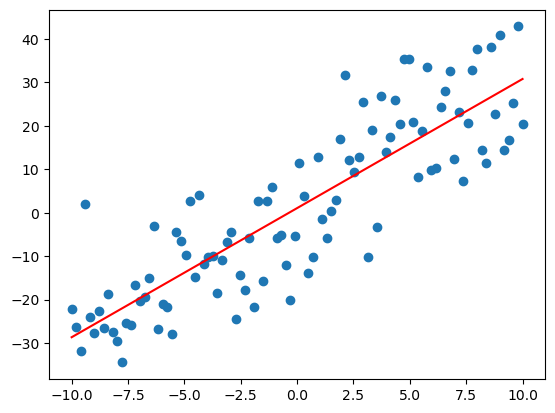

In [ ]:
plt.scatter(X.numpy(), Y.numpy())
plt.plot(X, Y_pred, color='red')

In [ ]:
# za provjeru gradijenata
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

Odredite analitičke izraze za gradijente funkcije gubitka po parametrima a i b. Izračunajte eksplicitno te gradijente. Ispišite vrijednosti gradijenata i uvjerite se da odgovaraju onima koje automatski određuje PyTorch.

In [ ]:
a, b = pt_linreg.linreg_pytorch_gradients_by_hand(a, b, X, Y)

Epoch: 0, loss:237.6524200439453, Y_:tensor([-9.0000, -8.7980, -8.5960, -8.3939, -8.1919, -7.9899, -7.7879, -7.5859,
        -7.3838, -7.1818, -6.9798, -6.7778, -6.5758, -6.3737, -6.1717, -5.9697,
        -5.7677, -5.5657, -5.3636, -5.1616, -4.9596, -4.7576, -4.5556, -4.3535,
        -4.1515, -3.9495, -3.7475, -3.5455, -3.3434, -3.1414, -2.9394, -2.7374,
        -2.5354, -2.3333, -2.1313, -1.9293, -1.7273, -1.5253, -1.3232, -1.1212,
        -0.9192, -0.7172, -0.5152, -0.3131, -0.1111,  0.0909,  0.2929,  0.4949,
         0.6970,  0.8990,  1.1010,  1.3030,  1.5051,  1.7071,  1.9091,  2.1111,
         2.3131,  2.5152,  2.7172,  2.9192,  3.1212,  3.3232,  3.5253,  3.7273,
         3.9293,  4.1313,  4.3333,  4.5354,  4.7374,  4.9394,  5.1414,  5.3434,
         5.5455,  5.7475,  5.9495,  6.1515,  6.3535,  6.5556,  6.7576,  6.9596,
         7.1616,  7.3636,  7.5657,  7.7677,  7.9697,  8.1717,  8.3737,  8.5758,
         8.7778,  8.9798,  9.1818,  9.3838,  9.5859,  9.7879,  9.9899, 10.1919,
   

In [ ]:
Y_pred = a * X + b

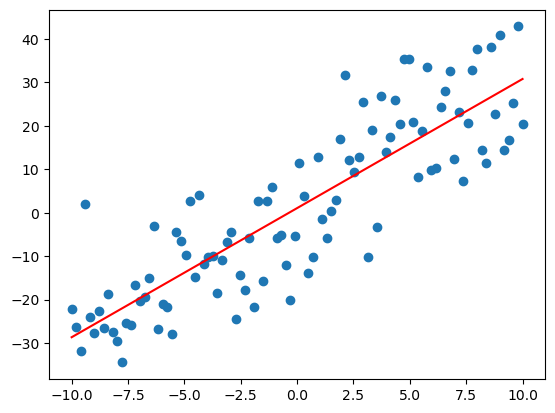

In [ ]:
plt.scatter(X.numpy(), Y.numpy())
with torch.no_grad():
    plt.plot(X, Y_pred, color='red')

**4. Logistička regresija u PyTorchu (20% bodova)**

*2 Klase*

In [ ]:
# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

K, C, N = 2, 2, 50
param_niter = 1000
param_delta = 1e-1

# instanciraj podatke X i labele Yoh_
X,Y_ = data.sample_gmm_2d(K, C, N)
Yoh_ = data.class_to_onehot(Y_)

In [ ]:
# definiraj model:
ptlr = pt_logreg.PTLogreg(X.shape[1], Yoh_.shape[1])

# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
pt_logreg.train(ptlr, X, Yoh_, param_niter, param_delta)

# dohvati vjerojatnosti na skupu za učenje
probs = pt_logreg.eval(ptlr, X)
Y_pred_ = np.argmax(probs, axis=1)

# ispiši performansu (preciznost i odziv po razredima)
data.eval_perf_binary(Y_pred_, Y_)
acuraccy, precision, recall = data.eval_perf_binary(np.argmax(probs, axis=1), Y_)
print(f'Acuraccy: {acuraccy}')
print(f'Precision: {precision}')
print(f'Recall: \n{recall}')

Epoch: 0/1000, Loss: 4.204740047454834
Epoch: 100/1000, Loss: 0.26626530289649963
Epoch: 200/1000, Loss: 0.2169436663389206
Epoch: 300/1000, Loss: 0.18991360068321228
Epoch: 400/1000, Loss: 0.17258267104625702
Epoch: 500/1000, Loss: 0.1604061722755432
Epoch: 600/1000, Loss: 0.1513233184814453
Epoch: 700/1000, Loss: 0.1442558914422989
Epoch: 800/1000, Loss: 0.1385810524225235
Epoch: 900/1000, Loss: 0.13391238451004028
Acuraccy: 0.97
Precision: 0.96
Recall: 
0.9795918367346939


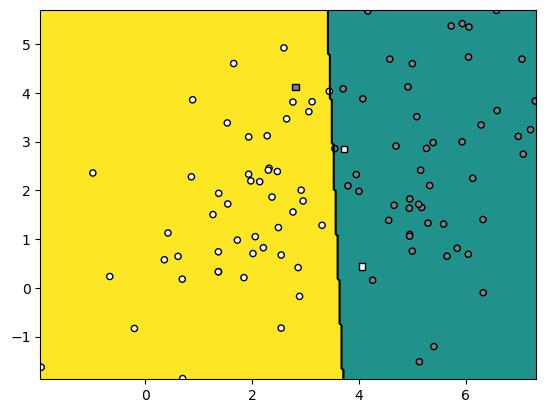

In [ ]:
# graph the decision surface
rect=(np.min(X, axis=0), np.max(X, axis=0))
ptlr_decfun = pt_logreg.pt_logreg_decfun(ptlr, X)
# graph the data points
data.graph_surface(ptlr_decfun, rect, offset=0.0) # function, domain
data.graph_data(X, Y_, Y_pred_) # data, ground_truth, predictions

*3 Klase*

In [ ]:
# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
C, N = 3, 100
param_niter = 1000
param_delta = 1e-1

# get data
X,Y_ = data.sample_gauss_2d(C, N) # sample_gmm_2d(K, C, N)
Yoh_ = data.class_to_onehot(Y_)

In [ ]:
# definiraj model:
ptlr = pt_logreg.PTLogreg(X.shape[1], Yoh_.shape[1])

# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
pt_logreg.train(ptlr, X, Yoh_, param_niter, param_delta)

# dohvati vjerojatnosti na skupu za učenje
probs = pt_logreg.eval(ptlr, X)
Y_pred_ = np.argmax(probs, axis=1)

# ispiši performansu (preciznost i odziv po razredima)
data.eval_perf_binary(Y_pred_, Y_)
acuraccy, precision, recall = data.eval_perf_multi(np.argmax(probs, axis=1), Y_)
print(f'Acuraccy: {acuraccy}')
print(f'Precision: {precision}')
print(f'Recall: \n{recall}')

Epoch: 0/1000, Loss: 14.03515911102295
Epoch: 100/1000, Loss: 0.40429118275642395
Epoch: 200/1000, Loss: 0.3516281545162201
Epoch: 300/1000, Loss: 0.31221866607666016
Epoch: 400/1000, Loss: 0.281271755695343
Epoch: 500/1000, Loss: 0.2566350996494293
Epoch: 600/1000, Loss: 0.2367977350950241
Epoch: 700/1000, Loss: 0.22062140703201294
Epoch: 800/1000, Loss: 0.20725314319133759
Epoch: 900/1000, Loss: 0.19605910778045654
Acuraccy: 0.9566666666666667
Precision: [(0.9, 0.967741935483871), (0.97, 0.9797979797979798), (1.0, 0.9259259259259259)]
Recall: 
[[ 90   2   8]
 [  3  97   0]
 [  0   0 100]]


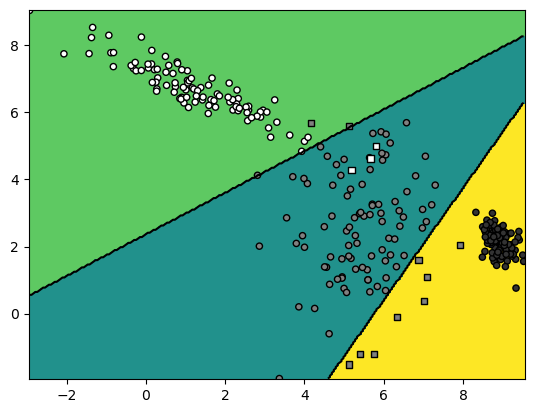

In [ ]:
# graph the decision surface
rect=(np.min(X, axis=0), np.max(X, axis=0))
ptlr_decfun = pt_logreg.pt_logreg_decfun(ptlr, X)
# graph the data points
data.graph_surface(ptlr_decfun, rect, offset=0.0) # function, domain
data.graph_data(X, Y_, Y_pred_) # data, ground_truth, predictions

Dodajte regularizaciju na način da gubitak formulirate kao zbroj unakrsne entropije i L2 norme vektorizirane matrice težina pomnožene hiperparametrom param_lambda. Ispitajte utjecaj regularizacije na oblik decizijske plohe.

Eksperimentirajte s različitim vrijednostima hiperparametara. Pronađite kombinacije hiperparametara za koje vaš program ne uspijeva pronaći zadovoljavajuće rješenje i pokušajte objasniti što se događa.

Epoch: 0/1000, Loss: 9.424966812133789
Epoch: 100/1000, Loss: 0.3775829076766968
Epoch: 200/1000, Loss: 0.33141085505485535
Epoch: 300/1000, Loss: 0.29620161652565
Epoch: 400/1000, Loss: 0.2684488892555237
Epoch: 500/1000, Loss: 0.24625976383686066
Epoch: 600/1000, Loss: 0.22828572988510132
Epoch: 700/1000, Loss: 0.21352648735046387
Epoch: 800/1000, Loss: 0.20124125480651855
Epoch: 900/1000, Loss: 0.19088245928287506


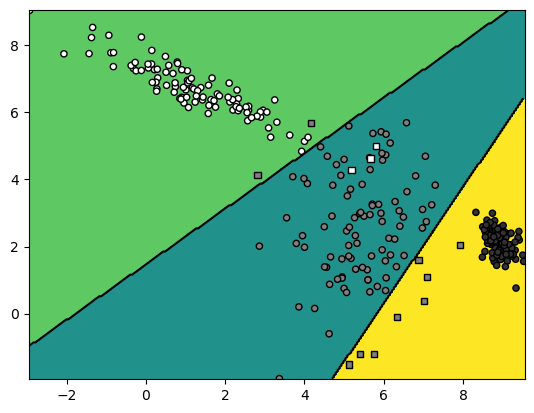

Epoch: 0/1000, Loss: 13.185898780822754
Epoch: 100/1000, Loss: 0.4540632665157318
Epoch: 200/1000, Loss: 0.389739066362381
Epoch: 300/1000, Loss: 0.3468357026576996
Epoch: 400/1000, Loss: 0.3160392642021179
Epoch: 500/1000, Loss: 0.2934473752975464
Epoch: 600/1000, Loss: 0.27660563588142395
Epoch: 700/1000, Loss: 0.2638610601425171
Epoch: 800/1000, Loss: 0.25408342480659485
Epoch: 900/1000, Loss: 0.2464906871318817


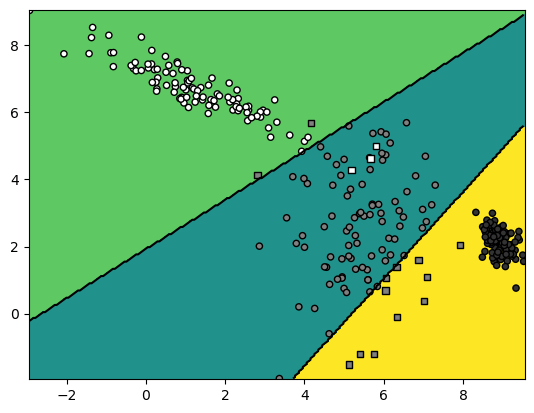

Epoch: 0/1000, Loss: 13.972221374511719
Epoch: 100/1000, Loss: 0.4015423059463501
Epoch: 200/1000, Loss: 0.39984506368637085
Epoch: 300/1000, Loss: 0.3993862271308899
Epoch: 400/1000, Loss: 0.39924323558807373
Epoch: 500/1000, Loss: 0.3991978168487549
Epoch: 600/1000, Loss: 0.39918339252471924
Epoch: 700/1000, Loss: 0.39917880296707153
Epoch: 800/1000, Loss: 0.39917734265327454
Epoch: 900/1000, Loss: 0.39917683601379395


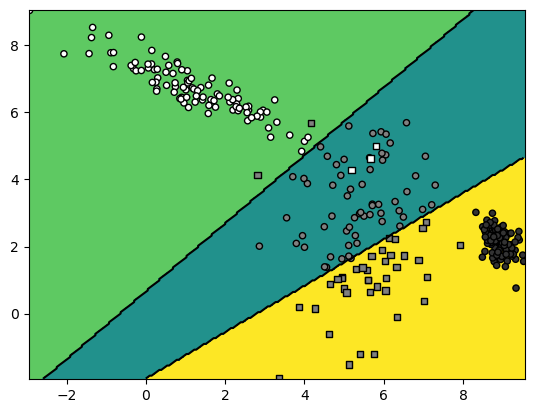

Epoch: 0/1000, Loss: 3.0855746269226074
Epoch: 100/1000, Loss: 0.5813648700714111
Epoch: 200/1000, Loss: 0.5813634395599365
Epoch: 300/1000, Loss: 0.5813634395599365
Epoch: 400/1000, Loss: 0.5813634395599365
Epoch: 500/1000, Loss: 0.5813634395599365
Epoch: 600/1000, Loss: 0.5813634395599365
Epoch: 700/1000, Loss: 0.5813634395599365
Epoch: 800/1000, Loss: 0.5813634395599365
Epoch: 900/1000, Loss: 0.5813634395599365


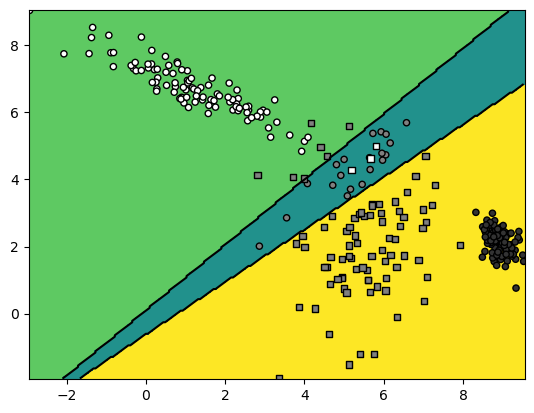

Epoch: 0/1000, Loss: 9.819534301757812
Epoch: 100/1000, Loss: 0.6536932587623596
Epoch: 200/1000, Loss: 0.6529139280319214
Epoch: 300/1000, Loss: 0.6527512073516846
Epoch: 400/1000, Loss: 0.652706503868103
Epoch: 500/1000, Loss: 0.652692973613739
Epoch: 600/1000, Loss: 0.65268874168396
Epoch: 700/1000, Loss: 0.6526873707771301
Epoch: 800/1000, Loss: 0.6526868939399719
Epoch: 900/1000, Loss: 0.6526868939399719


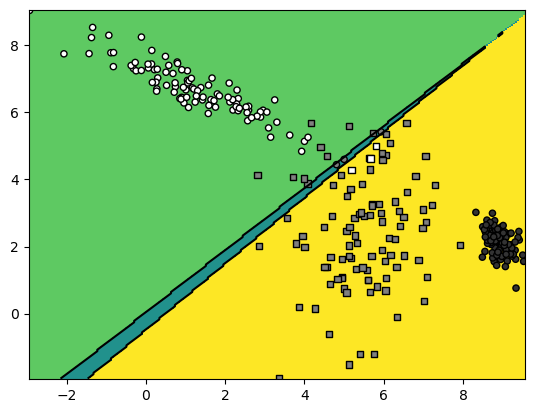

In [ ]:
param_lambdas = [1e-5, 1e-2, 1e-1, 1, 2]

for param_lambda in param_lambdas:
    ptlr = pt_logreg.PTLogreg(X.shape[1], Yoh_.shape[1])
    # nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
    pt_logreg.train(ptlr, X, Yoh_, param_niter, param_delta, param_lambda)

    # dohvati vjerojatnosti na skupu za učenje
    probs = pt_logreg.eval(ptlr, X)
    Y_pred_ = np.argmax(probs, axis=1)
    # graph the decision surface
    rect=(np.min(X, axis=0), np.max(X, axis=0))
    ptlr_decfun = pt_logreg.pt_logreg_decfun(ptlr, X)
    # graph the data points
    data.graph_surface(ptlr_decfun, rect, offset=0.0) # function, domain
    data.graph_data(X, Y_, Y_pred_) # data, ground_truth, predictions

    plt.show()

**5. Konfigurabilni duboki modeli u PyTorchu (20% bodova)**

Izvedite razred PTDeep te isprobajte konfiguraciju [2, 3] na istim podatcima kao i u prethodnom zadatku (ispitni program će vam biti vrlo sličan). Provjerite da su rezultati isti kao i ranije.

In [ ]:
# konfiguracija [2, 3]
# definiraj model:
ptdeep = pt_deep.PTDeep([2, 3], torch.relu)

# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
pt_deep.train(ptdeep, X, Yoh_, param_niter, param_delta)

# dohvati vjerojatnosti na skupu za učenje
probs = pt_deep.eval(ptdeep, X)
Y_pred_ = np.argmax(probs, axis=1)

# ispiši performansu (preciznost i odziv po razredima)
data.eval_perf_binary(Y_pred_, Y_)
acuraccy, precision, recall = data.eval_perf_multi(np.argmax(probs, axis=1), Y_)
print(f'Acuraccy: {acuraccy}')
print(f'Precision: {precision}')
print(f'Recall: \n{recall}')

Epoch: 0/1000, Loss: 7.902073383331299
Epoch: 100/1000, Loss: 0.41916024684906006
Epoch: 200/1000, Loss: 0.3619462549686432
Epoch: 300/1000, Loss: 0.3202824294567108
Epoch: 400/1000, Loss: 0.28770533204078674
Epoch: 500/1000, Loss: 0.2618294656276703
Epoch: 600/1000, Loss: 0.2410484254360199
Epoch: 700/1000, Loss: 0.22415311634540558
Epoch: 800/1000, Loss: 0.2102339267730713
Epoch: 900/1000, Loss: 0.19861386716365814
Acuraccy: 0.9533333333333334
Precision: [(0.9, 0.9574468085106383), (0.96, 0.9795918367346939), (1.0, 0.9259259259259259)]
Recall: 
[[ 90   2   8]
 [  4  96   0]
 [  0   0 100]]


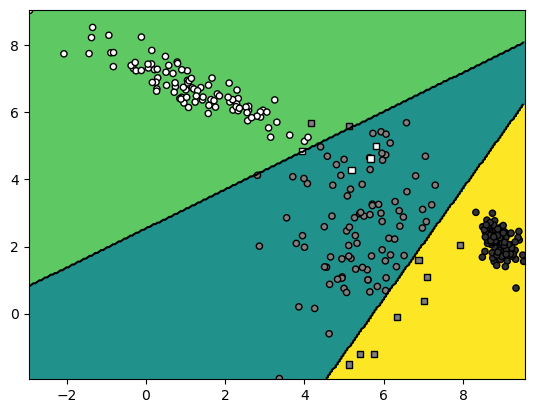

In [ ]:
# graph the decision surface
rect=(np.min(X, axis=0), np.max(X, axis=0))
ptdeep_decfun = pt_deep.pt_deep_decfun(ptdeep, X)
# graph the data points
data.graph_surface(ptdeep_decfun, rect, offset=0.0) # function, domain
data.graph_data(X, Y_, Y_pred_) # data, ground_truth, predictions

Napišite metodu count_params koja će ispisati simboličko ime i dimenzije tenzora svih parametara. Dodatno, neka funkcija računa i ukupan broj parametara modela (npr. za konfiguraciju [2, 3] rezultat bi trebao biti 9). Za obilazak svih parametara modela sada elegantno možemo koristiti iterator named_parameters.

In [ ]:
pt_deep.count_params(ptdeep)

Model PTDeep
weights.0
Parameter containing:
tensor([[-0.3484, -1.4717,  0.6762],
        [-0.2476,  1.6865, -0.8707]], requires_grad=True)
biases.0
Parameter containing:
tensor([ 4.3563, -0.5905, -1.5421], requires_grad=True)
Total parameters: 9


Isprobajte vaš kod na podatcima dobivenim pozivima data.sample_gmm_2d(4, 2, 40) i data.sample_gmm_2d(6, 2, 10), za konfiguracije [2, 2], [2, 10, 2] i [2, 10, 10, 2]. Ispišite točnost, odziv, preciznost i prosječnu preciznost te grafički prikažite rezultate klasifikacije i izgled decizijske plohe. Ako ne dođe do konvergencije, obratite pažnju na vrijednosti hiperparametara.

Usporedite rezultate s onim što se zbiva kad za prijenosnu funkciju postavite sigmoidu. Sigmoida bi za ovakve male probleme zbog neprekidnosti trebala postići bolje rezultate od zglobnice. Glavna prednost zglobnice je u tome što nema zasićenje pa kod dubljih modela gradijenti teže nestaju.

In [ ]:
# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
K, C, N = 4, 2, 40
X,Y_ = data.sample_gmm_2d(K, C, N)
Yoh_ = data.class_to_onehot(Y_)

In [ ]:
configs = [[2, 2], [2, 10, 2], [2, 10, 10, 2]]
param_niter = [1e4] * 6 # za ukupno 6 modela
param_delta= [0.3, 0.01, 0.01, 0.01, 0.02, 0.01]
param_lambda= [1e-2, 1e-2, 1e-2, 1e-2, 1e-3, 1e-6]
activation_funcs = ["ReLU", "Sigmoid"]

In [ ]:
def plot_task_5(X, Y_, Yoh_, configs, param_niter, param_delta, param_lambda, activation_funcs):
    ptdeep = None
    cnt = 0
    for i in range(len(configs)):
        for activation_func in activation_funcs:
            if activation_func == "ReLU":
                ptdeep = pt_deep.PTDeep(configs[i], torch.relu)
            elif activation_func == "Sigmoid":
                ptdeep = pt_deep.PTDeep(configs[i], torch.sigmoid)

            pt_deep.train(ptdeep, X, Yoh_, param_niter[cnt], param_delta[cnt], param_lambda[cnt], every_n_epochs=2000)

            # dohvati vjerojatnosti na skupu za učenje
            probs = pt_deep.eval(ptdeep, X)
            Y_pred_ = np.argmax(probs, axis=1)

            # ispiši performansu (preciznost i odziv po razredima)
            data.eval_perf_binary(Y_pred_, Y_)
            acuraccy, precision, recall = data.eval_perf_multi(Y_pred_, Y_)
            print(f'Acuraccy: {acuraccy}')
            print(f'Precision: {precision}')
            print(f'Recall: \n{recall}')
            print(f'Average acuraccy:')
            # graph the decision surface
            rect=(np.min(X, axis=0), np.max(X, axis=0))
            ptdeep_decfun = pt_deep.pt_deep_decfun(ptdeep, X)
            # graph the data points
            data.graph_surface(ptdeep_decfun, rect, offset=0.0) # function, domain
            data.graph_data(X, Y_, Y_pred_) # data, ground_truth, predictions
            plt.title('K='+str(K)+', C='+str(C)+', N='+str(N)+', config='+str(configs[i])+", "+activation_func)
            plt.show()
            cnt += 1

Epoch: 0/10000, Loss: 4.15891170501709
Epoch: 2000/10000, Loss: 0.44379210472106934
Epoch: 4000/10000, Loss: 0.44379210472106934
Epoch: 6000/10000, Loss: 0.44379204511642456
Epoch: 8000/10000, Loss: 0.44379204511642456
Acuraccy: 0.6875
Precision: [(0.6125, 0.7205882352941176), (0.7625, 0.6630434782608695)]
Recall: 
[[49 31]
 [19 61]]
Average acuraccy:


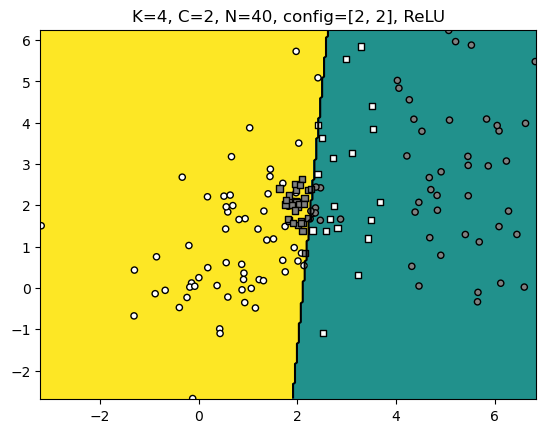

Epoch: 0/10000, Loss: 0.8657897114753723
Epoch: 2000/10000, Loss: 0.45133060216903687
Epoch: 4000/10000, Loss: 0.4450218081474304
Epoch: 6000/10000, Loss: 0.4440622925758362
Epoch: 8000/10000, Loss: 0.44385606050491333
Acuraccy: 0.6875
Precision: [(0.6125, 0.7205882352941176), (0.7625, 0.6630434782608695)]
Recall: 
[[49 31]
 [19 61]]
Average acuraccy:


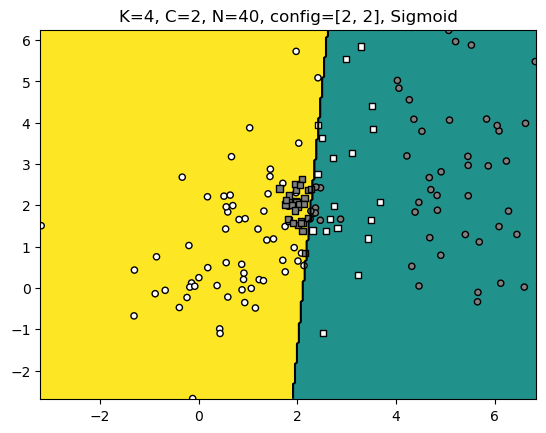

Epoch: 0/10000, Loss: 4.103155612945557
Epoch: 2000/10000, Loss: 0.3968111276626587
Epoch: 4000/10000, Loss: 0.3629516065120697
Epoch: 6000/10000, Loss: 0.34599655866622925
Epoch: 8000/10000, Loss: 0.3388485014438629
Acuraccy: 0.88125
Precision: [(0.95, 0.8351648351648352), (0.8125, 0.9420289855072463)]
Recall: 
[[76  4]
 [15 65]]
Average acuraccy:


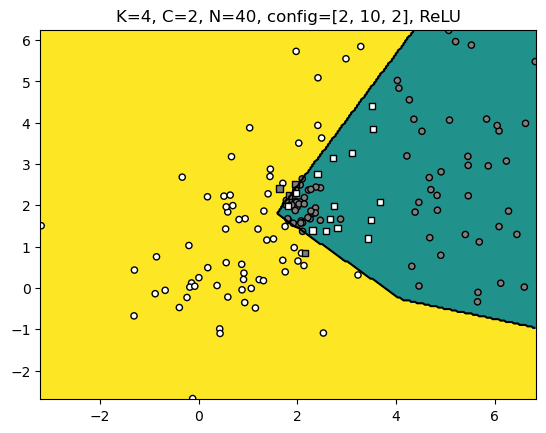

Epoch: 0/10000, Loss: 0.8187872171401978
Epoch: 2000/10000, Loss: 0.448047935962677
Epoch: 4000/10000, Loss: 0.43427973985671997
Epoch: 6000/10000, Loss: 0.43046870827674866
Epoch: 8000/10000, Loss: 0.4280964434146881
Acuraccy: 0.76875
Precision: [(0.75, 0.7792207792207793), (0.7875, 0.7590361445783133)]
Recall: 
[[60 20]
 [17 63]]
Average acuraccy:


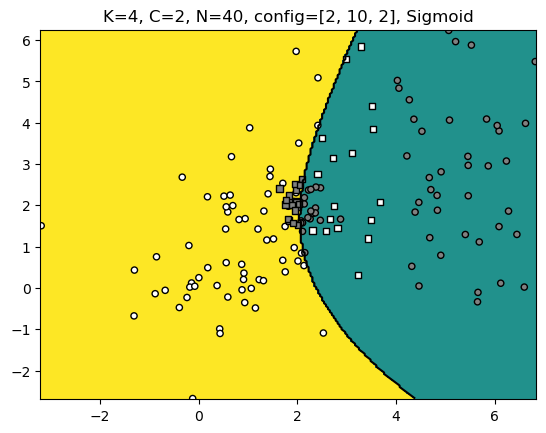

Epoch: 0/10000, Loss: 5.228981971740723
Epoch: 2000/10000, Loss: 0.2671446204185486
Epoch: 4000/10000, Loss: 0.15281562507152557
Epoch: 6000/10000, Loss: 0.1355917751789093
Epoch: 8000/10000, Loss: 0.12881571054458618
Acuraccy: 0.9375
Precision: [(0.9625, 0.9166666666666666), (0.9125, 0.9605263157894737)]
Recall: 
[[77  3]
 [ 7 73]]
Average acuraccy:


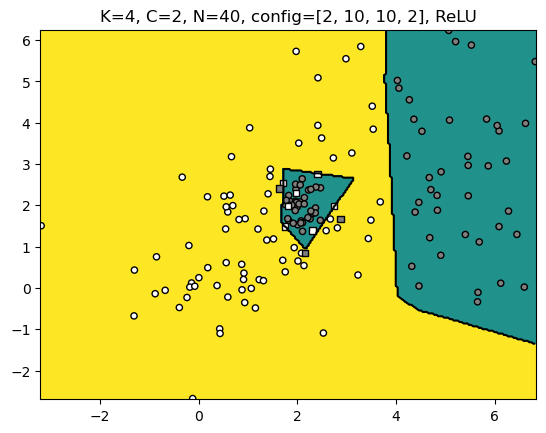

Epoch: 0/10000, Loss: 0.8453489542007446
Epoch: 2000/10000, Loss: 0.4653703272342682
Epoch: 4000/10000, Loss: 0.4074277877807617
Epoch: 6000/10000, Loss: 0.3909449875354767
Epoch: 8000/10000, Loss: 0.37324830889701843
Acuraccy: 0.8625
Precision: [(0.95, 0.8085106382978723), (0.775, 0.9393939393939394)]
Recall: 
[[76  4]
 [18 62]]
Average acuraccy:


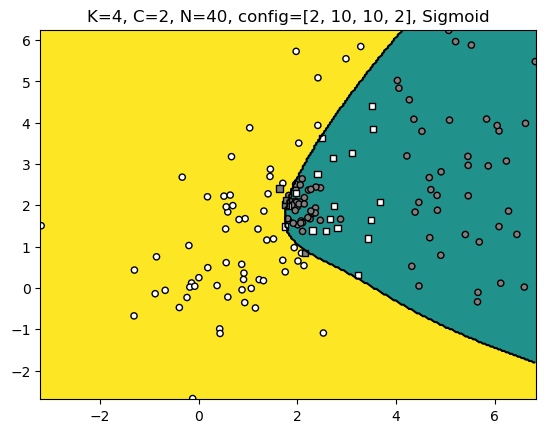

In [ ]:
plot_task_5(X, Y_, Yoh_, configs, param_niter, param_delta, param_lambda, activation_funcs)

In [ ]:
# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
K, C, N = 6, 2, 10
X,Y_ = data.sample_gmm_2d(K, C, N)
Yoh_ = data.class_to_onehot(Y_)

In [ ]:
configs = [[2, 2], [2, 10, 2], [2, 10, 10, 2]]
param_niter = [1e4] * 6 # za ukupno 6 modela
param_delta= [0.1, 0.01, 0.2, 0.2, 0.01, 0.01]
param_lambda= [1e-2, 1e-4, 1e-4, 1e-4, 1e-3, 1e-10]
activation_funcs = ["ReLU", "Sigmoid"]

Epoch: 0/10000, Loss: 2.205566167831421
Epoch: 2000/10000, Loss: 0.6682079434394836
Epoch: 4000/10000, Loss: 0.6682079434394836
Epoch: 6000/10000, Loss: 0.6682079434394836
Epoch: 8000/10000, Loss: 0.6682079434394836
Acuraccy: 0.6
Precision: [(0.5666666666666667, 0.6071428571428571), (0.6333333333333333, 0.59375)]
Recall: 
[[17 13]
 [11 19]]
Average acuraccy:


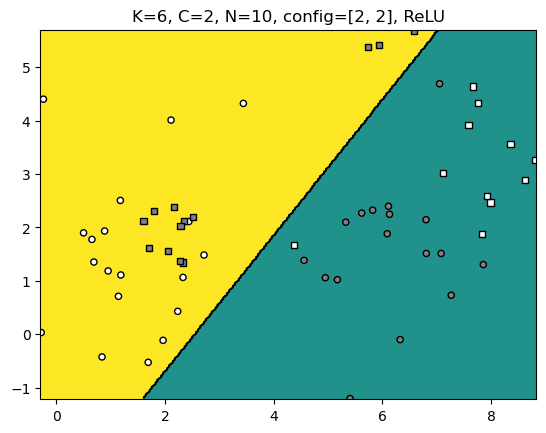

Epoch: 0/10000, Loss: 8.484884262084961
Epoch: 2000/10000, Loss: 0.6697954535484314
Epoch: 4000/10000, Loss: 0.6681851744651794
Epoch: 6000/10000, Loss: 0.6681639552116394
Epoch: 8000/10000, Loss: 0.6681636571884155
Acuraccy: 0.6
Precision: [(0.5666666666666667, 0.6071428571428571), (0.6333333333333333, 0.59375)]
Recall: 
[[17 13]
 [11 19]]
Average acuraccy:


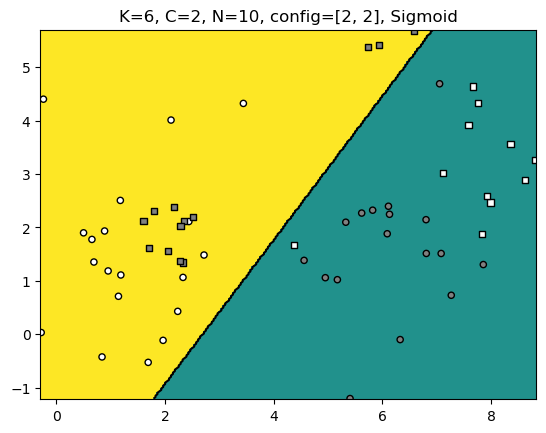

Epoch: 0/10000, Loss: 5.274203300476074
Epoch: 2000/10000, Loss: 0.40555569529533386
Epoch: 4000/10000, Loss: 0.25750887393951416
Epoch: 6000/10000, Loss: 0.18775959312915802
Epoch: 8000/10000, Loss: 0.13080313801765442
Acuraccy: 0.9666666666666667
Precision: [(0.9666666666666667, 0.9666666666666667), (0.9666666666666667, 0.9666666666666667)]
Recall: 
[[29  1]
 [ 1 29]]
Average acuraccy:


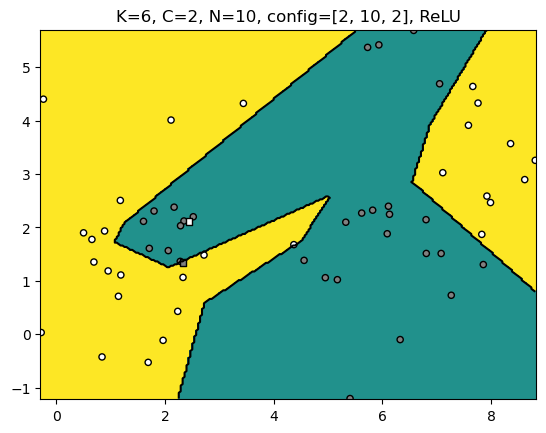

Epoch: 0/10000, Loss: 1.4755858182907104
Epoch: 2000/10000, Loss: 0.42750445008277893
Epoch: 4000/10000, Loss: 0.40770336985588074
Epoch: 6000/10000, Loss: 0.3959273099899292
Epoch: 8000/10000, Loss: 0.23622824251651764
Acuraccy: 0.9166666666666666
Precision: [(0.9333333333333333, 0.9032258064516129), (0.9, 0.9310344827586207)]
Recall: 
[[28  2]
 [ 3 27]]
Average acuraccy:


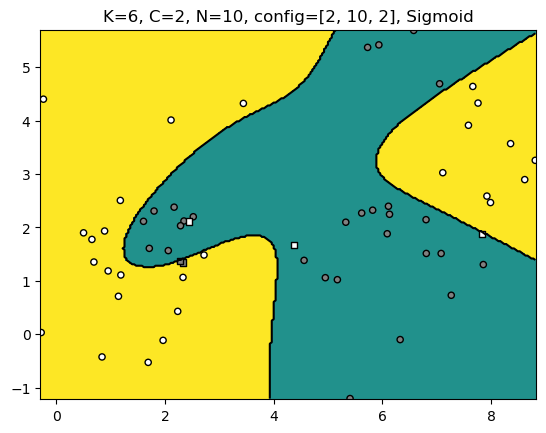

Epoch: 0/10000, Loss: 9.841548919677734
Epoch: 2000/10000, Loss: 0.4018617570400238
Epoch: 4000/10000, Loss: 0.346160888671875
Epoch: 6000/10000, Loss: 0.32295912504196167
Epoch: 8000/10000, Loss: 0.3099089562892914
Acuraccy: 0.9333333333333333
Precision: [(1.0, 0.8823529411764706), (0.8666666666666667, 1.0)]
Recall: 
[[30  0]
 [ 4 26]]
Average acuraccy:


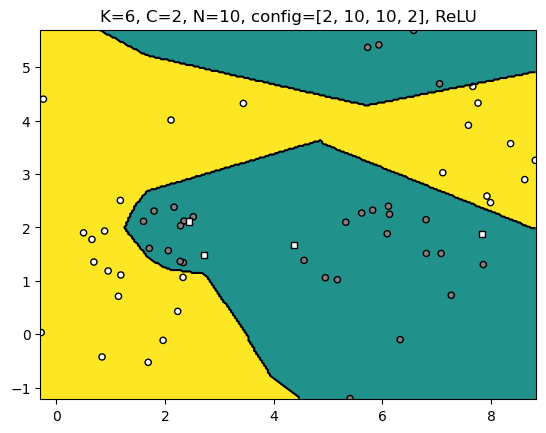

Epoch: 0/10000, Loss: 2.177853584289551
Epoch: 2000/10000, Loss: 0.5883333086967468
Epoch: 4000/10000, Loss: 0.5589832067489624
Epoch: 6000/10000, Loss: 0.5254595875740051
Epoch: 8000/10000, Loss: 0.48629963397979736
Acuraccy: 0.85
Precision: [(0.9333333333333333, 0.8), (0.7666666666666667, 0.92)]
Recall: 
[[28  2]
 [ 7 23]]
Average acuraccy:


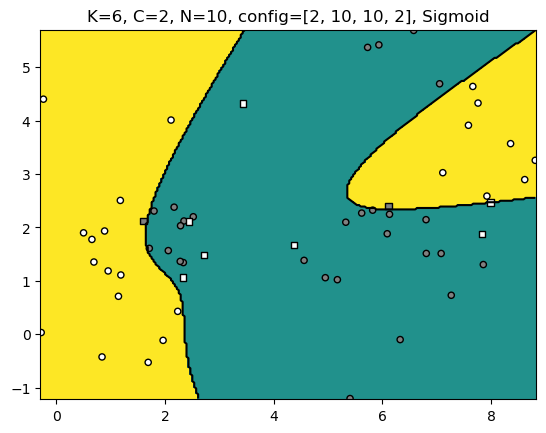

In [ ]:
plot_task_5(X, Y_, Yoh_, configs, param_niter, param_delta, param_lambda, activation_funcs)

**6. Usporedba s jezgrenim SVM-om (10% bodova)**

In [ ]:
K, C, N = 6, 2, 10
configs = [[2, 10, 10, 2]]
param_niter = [1e4] * 2 # za ukupno 6 modela
param_delta= [0.02, 0.01]
param_lambda= [1e-4] * 2
kernels = ['rbf', 'poly']
activation_funcs = ['ReLU', 'Sigmoid']

ptdeep = None
cnt = 0
for i in range(len(configs)):
    X,Y_ = data.sample_gmm_2d(K, C, N)
    Yoh_ = data.class_to_onehot(Y_)
    for activation_func in activation_funcs:
        if activation_func == "ReLU":
            ptdeep = pt_deep.PTDeep(configs[i], torch.relu)
        elif activation_func == "Sigmoid":
            ptdeep = pt_deep.PTDeep(configs[i], torch.sigmoid)

        pt_deep.train(ptdeep, X, Yoh_, param_niter[cnt], param_delta[cnt], param_lambda[cnt], every_n_epochs=2000)

        # dohvati vjerojatnosti na skupu za učenje
        probs = pt_deep.eval(ptdeep, X)
        Y_pred_ = np.argmax(probs, axis=1)

        # ispiši performansu (preciznost i odziv po razredima)
        data.eval_perf_binary(Y_pred_, Y_)
        acuraccy, precision, recall = data.eval_perf_multi(Y_pred_, Y_)
        print("-------PTDeep model-------")
        print(f'Configuration: {configs[i]}, activation_function: {activation_func}')
        print(f'Acuraccy: {acuraccy}')
        print(f'Precision: {precision}')
        print(f'Recall: \n{recall}')
        print(f'Average acuraccy:')
        print("__________________________________________________")
    for j in range(len(kernels)):
        ksvm = ksvm_wrap.KSVMWrap(X, Y_)
        Y_pred = ksvm.predict(X)
        print("-------SVM model-------")
        print(f'Kernel: {kernels[j]}')
        print(f'Acuraccy: {acuraccy}')
        print(f'Precision: {precision}')
        print(f'Recall: \n{recall}')
        print(f'Average acuraccy:')
        print("__________________________________________________")


Epoch: 0/10000, Loss: 13.86501693725586
Epoch: 2000/10000, Loss: 0.21163013577461243
Epoch: 4000/10000, Loss: 0.1516268402338028
Epoch: 6000/10000, Loss: 0.13335667550563812
Epoch: 8000/10000, Loss: 0.12560544908046722
-------PTDeep model-------
Configuration: [2, 10, 10, 2], activation_function: ReLU
Acuraccy: 0.9833333333333333
Precision: [(0.95, 1.0), (1.0, 0.975609756097561)]
Recall: 
[[19  1]
 [ 0 40]]
Average acuraccy:
__________________________________________________
Epoch: 0/10000, Loss: 0.9507656097412109
Epoch: 2000/10000, Loss: 0.583560585975647
Epoch: 4000/10000, Loss: 0.5270987749099731
Epoch: 6000/10000, Loss: 0.4688461422920227
Epoch: 8000/10000, Loss: 0.39364922046661377
-------PTDeep model-------
Configuration: [2, 10, 10, 2], activation_function: Sigmoid
Acuraccy: 0.9
Precision: [(0.8, 0.8888888888888888), (0.95, 0.9047619047619048)]
Recall: 
[[16  4]
 [ 2 38]]
Average acuraccy:
__________________________________________________
-------SVM model-------
Kernel: rbf
Ac

In [ ]:
# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
K, C, N = 6, 2, 10
X,Y_ = data.sample_gmm_2d(K, C, N)

In [ ]:
ksvm = ksvm_wrap.KSVMWrap(X, Y_)

Y_pred = ksvm.predict(X)

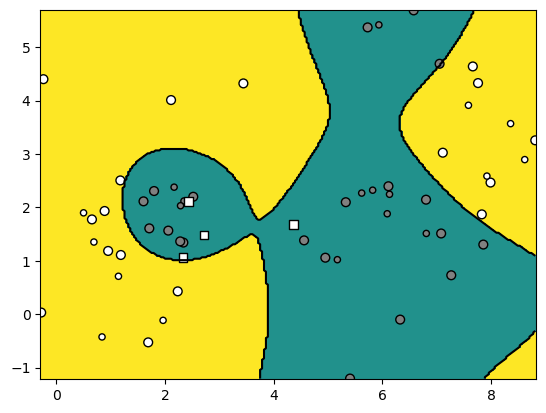

In [ ]:
rect=(np.min(X, axis=0), np.max(X, axis=0))
ksvmwrap_df = ksvm_wrap.ksvmwrap_decfun(ksvm, X)

data.graph_surface(ksvmwrap_df, rect, offset=0.0) # function, domain
data.graph_data(X, Y_, Y_pred, ksvm.support()) # data, ground_truth, predictions

**7. Studija slučaja: MNIST (20% bodova)**

In [ ]:
if torch.cuda.is_available():
    print("cuda")
    device = torch.device("cuda")
else:
    print("cpu")
    device = torch.device("cpu")


cuda


In [ ]:
dataset_root = '/tmp/mnist'  # change this to your preference
mnist_train = torchvision.datasets.MNIST(dataset_root, train=True, download=True)
mnist_test = torchvision.datasets.MNIST(dataset_root, train=False, download=True)

x_train, y_train = mnist_train.data, mnist_train.targets
x_test, y_test = mnist_test.data, mnist_test.targets
x_train, x_test = x_train.float().div_(255.0), x_test.float().div_(255.0)

100%|██████████| 9912422/9912422 [00:00<00:00, 208114766.48it/s]

Extracting /tmp/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 82856151.73it/s]


Extracting /tmp/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 211120684.92it/s]

Extracting /tmp/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19721044.27it/s]


Extracting /tmp/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/mnist/MNIST/raw



In [ ]:
print(x_train.shape, x_test.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [ ]:
N = x_train.shape[0]
D = x_train.shape[1] * x_train.shape[2]
C = y_train.max().add_(1).item()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch
import torchvision

device = None
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


class PTDeep(nn.Module):
    def __init__(self, layer_dims, activation_func):
        """Arguments:
           - layer_dims: num of neurons per layer
           - activation_func: type of activation func
        """
        super(PTDeep, self).__init__()
        # inicijalizirati parametre (koristite nn.Parameter):
        # imena mogu biti self.W, self.b
        # ...
        self.weights = nn.ParameterList([])
        self.biases = nn.ParameterList([])
        for i in range(1, len(layer_dims)):
            self.weights.append(nn.Parameter(torch.zeros((layer_dims[i-1], layer_dims[i]), dtype=torch.float32).to(device)))
            self.biases.append(nn.Parameter(torch.zeros((1, layer_dims[i]), dtype=torch.float32, device=device).to(device)))
        self.activation_funcs = activation_func

    def forward(self, X):
        X = X.to(device)
        """
        Arguments:
            - X: model inputs [NxD], type: torch.Tensor
        Output:
            - y_pred: model prediction [NxC]
        """

        for i in range(len(self.weights) - 1):
            X = torch.mm(X, self.weights[i]) + self.biases[i]
            X = self.activation_funcs(X)

        X = torch.mm(X, self.weights[len(self.weights)-1]) + self.biases[len(self.biases)-1]

        return torch.softmax(X, dim=1)

    def get_loss(self, y_pred, Yoh_):
        # formulacija gubitka
        #   koristiti: torch.log, torch.exp, torch.sum
        #   pripaziti na numerički preljev i podljev
        # ...
        N = y_pred.shape[0]
        Yoh_indices = torch.argmax(Yoh_, dim=1)
        #print(y_pred, torch.log(y_pred[np.arange(0, N), Yoh_indices]))
        return -torch.mean(torch.log(y_pred[np.arange(0, N), Yoh_indices]))


def train(model, X, Yoh_, param_niter=1000, param_delta=0.5, param_lambda=0.01, every_n_epochs=100, which_optim='SGD'):
    """Arguments:
     - X: model inputs [NxD], type: torch.Tensor
     - Yoh_: ground truth [NxC], type: torch.Tensor
     - param_niter: number of training iterations
     - param_delta: learning rate
    """
    # inicijalizacija optimizatora
    model.to(device)
    X.to(device)
    Yoh_.to(device)

    optimizer = None
    if which_optim == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=param_delta, weight_decay=param_lambda)
    else:
        optimizer = optim.Adam(model.parameters(), lr=param_delta, weight_decay=param_lambda)
    losses = []
    # petlja učenja
    for epoch in range(int(param_niter)):
        # ispisujte gubitak tijekom učenja
        # forward prop
        y_pred = model.forward(X)
        # backward prop
        loss = model.get_loss(y_pred, Yoh_)
        for w in model.weights:
          loss += param_lambda * torch.norm(w)
        loss.backward()
        # korak optimizacije
        optimizer.step()
        # postavljanje gradijenata na nula
        optimizer.zero_grad()
        if epoch % every_n_epochs == 0:
            print(f'Epoch: {epoch}/{int(param_niter)}, Loss: {loss}')

        losses.append(loss)

    return losses

def eval(model, X):
    """Arguments:
     - model: type: PTDeep
     - X: actual datapoints [NxD], type: np.array
     Returns: predicted class probabilites [NxC], type: np.array
    """
    # ulaz je potrebno pretvoriti u torch.Tensor
    # izlaze je potrebno pretvoriti u numpy.array
    # koristite torch.Tensor.detach() i torch.Tensor.numpy()
    X = torch.Tensor(X).to(device)
    y_pred_tensor = model.forward(X)
    y_pred_numpy = y_pred_tensor.cpu().detach().numpy()
    return y_pred_numpy

def count_params(model):
    cnt = 0
    total_params = 0
    print("Model", model.__class__.__name__)
    for name, param in model.named_parameters():
        print(name)
        print(param)
        if cnt % 2 == 0:
            total_params += (param.shape[0] * param.shape[1])
        else:
            total_params += param.shape[0]
        cnt += 1
    print("Total parameters:", total_params)


def plot_mnist_last_layer_weights(weights):
    weights_mnist_last_layer = weights[-1].reshape(28, 28, 10)
    cmap = plt.get_cmap('gray')
    fig, axis = plt.subplots(2, 5)
    row, col = 0, 0
    for c in range(weights_mnist_last_layer.shape[2]):
        axis[row, col].imshow(weights_mnist_last_layer[:, :, c].cpu().detach().numpy())
        col += 1
        if col % 5 == 0:
            row += 1
            col = 0

def plot_loss_history(loss, epochs):
    plt.plot(np.arange(0, epochs + 1), loss.cpu().detach().to_numpy())


def pt_deep_decfun(model, X):
    def classify(X):
        return np.argmax(eval(model, X), axis=1)
    return classify

def model_performance(X, Y_, Yoh_, model, which):
    # evaluacija na podatcima
    y_pred = eval(model, X)
    # ispiši performansu (preciznost i odziv po razredima)
    acuraccy, precision, recall = data.eval_perf_multi(np.argmax(y_pred, axis=1), Y_)
    print(f'------------------------------------------------------------{which}------------------------------------------------------------')
    print(f'Acuraccy: {acuraccy}')
    print(f'Precision: {precision}')
    print(f'Recall: \n{recall}')

    return acuraccy, precision, recall


Za model konfiguracije [784, 10] iscrtajte i komentirajte naučene matrice težina za svaku pojedinu znamenku. Ponovite za različite iznose regularizacije.

Lambda:  0
Epoch: 0/500, Loss: 2.3025853633880615
Epoch: 100/500, Loss: 0.39264580607414246
Epoch: 200/500, Loss: 0.3468320071697235
Epoch: 300/500, Loss: 0.32645514607429504
Epoch: 400/500, Loss: 0.3141767680644989


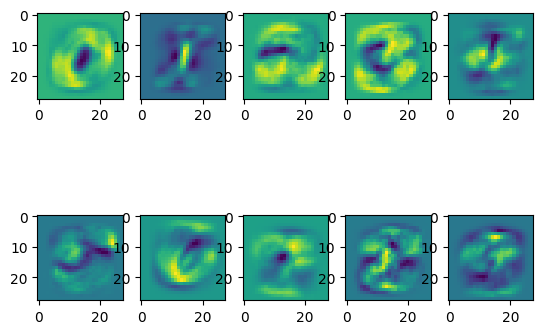

Lambda:  0.01
Epoch: 0/500, Loss: 2.3025853633880615
Epoch: 100/500, Loss: 0.499817818403244
Epoch: 200/500, Loss: 0.4797954559326172
Epoch: 300/500, Loss: 0.47509920597076416
Epoch: 400/500, Loss: 0.4735542833805084


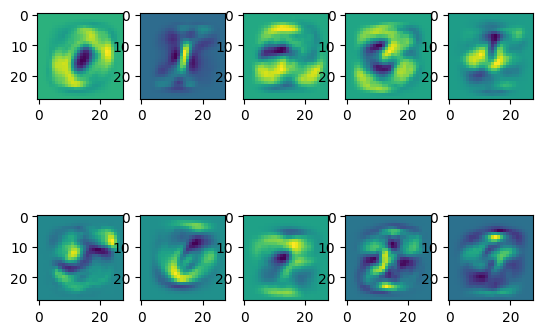

Lambda:  0.1
Epoch: 0/500, Loss: 2.3025853633880615
Epoch: 100/500, Loss: 1.1167000532150269
Epoch: 200/500, Loss: 1.0965136289596558
Epoch: 300/500, Loss: 1.0946688652038574
Epoch: 400/500, Loss: 1.0944072008132935


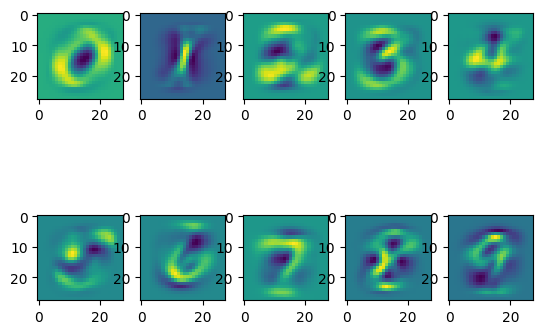

Lambda:  0.5
Epoch: 0/500, Loss: 2.3025853633880615
Epoch: 100/500, Loss: 2.0472493171691895
Epoch: 200/500, Loss: 2.044971227645874
Epoch: 300/500, Loss: 2.044935941696167
Epoch: 400/500, Loss: 2.0449347496032715


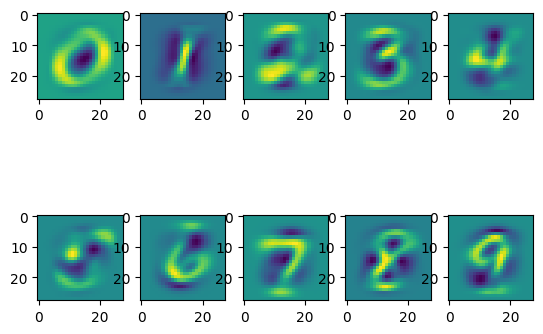

In [ ]:
lambdas = [0, 1e-2, 1e-1, 0.5]
deltas = [0.5, 0.5, 0.1, 0.05]
models = [] # za spremanje modela
train_losses = []

for i in range(len(lambdas)):
  print("Lambda: ", lambdas[i])
  pt_deep_mnist = PTDeep([784, 10], torch.relu)
  y_train_oh_ = data.class_to_onehot(y_train)
  loss_history = train(pt_deep_mnist, x_train.reshape(N, D), torch.from_numpy(y_train_oh_), param_niter=500, param_delta=deltas[i], param_lambda=lambdas[i], every_n_epochs=100, which_optim='SGD')
  train_losses.append(loss_history)
  plot_mnist_last_layer_weights(pt_deep_mnist.weights)
  plt.show()
  models.append(pt_deep_mnist)

Usporedite modele s obzirom na kretanje gubitka kroz epohe

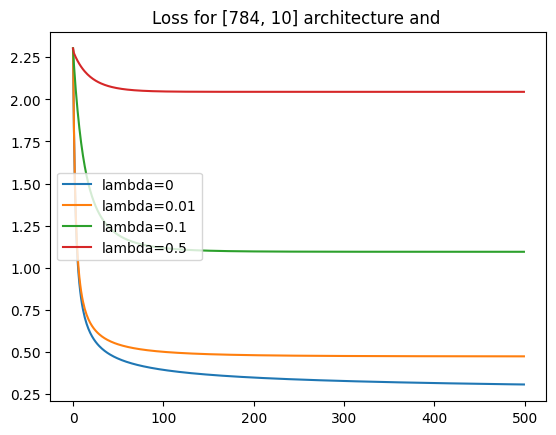

In [ ]:
plt.title('Loss for [784, 10] architecture and ')
for i in range(len(train_losses)):
  plt.plot(np.arange(0, len(train_losses[i])), [loss.cpu().detach().numpy() for loss in train_losses[i]], label=f'lambda={lambdas[i]}')
plt.legend()

pokazatelje performanse (točnost, preciznost, odziv) na skupovima za učenje i testiranje.

In [ ]:
y_train_oh_ = data.class_to_onehot(y_train)
y_test_oh_ = data.class_to_onehot(y_test)
best_model_cnt = None
best_acc = -1

for i in range(len(models)):
  # na train skupu
  print("lambda="+str(lambdas[i]))
  _, _, _ = model_performance(x_train.reshape(N, D), y_train, y_train_oh_, models[i], 'TRAIN')

  # na test skupu
  acuraccy, _, _ = model_performance(x_test.reshape(-1, D), y_test, y_test_oh_, models[i], 'TEST')

  print("\n\n")

  if acuraccy > best_acc:
    best_acc = acuraccy
    best_model_cnt = i
    best_model = models[i]



lambda=0
------------------------------------------------------------TRAIN------------------------------------------------------------
Acuraccy: 0.9154666666666667
Precision: [(0.9653891608981935, 0.9525237381309345), (0.969000296647879, 0.9417615684013262), (0.8853642161799261, 0.91168337366056), (0.8848474963301256, 0.9046189761547441), (0.9272509414584047, 0.9133367054459619), (0.8618336100350489, 0.8895658796648895), (0.953362622507604, 0.934260639178672), (0.9235434956105347, 0.930225080385852), (0.8803623312254315, 0.8817185895241356), (0.8924188939317532, 0.8858668446520941)]
Recall: 
[[5718    0   23   13   11   43   47    8   54    6]
 [   2 6533   33   28    6   33    7   17   74    9]
 [  43   63 5275   91  102   23   88   91  152   30]
 [  21   32  139 5425    5  222   32   69  120   66]
 [  10   32   37    6 5417    3   62   12   40  223]
 [  79   42   45  185   62 4672  105   25  144   62]
 [  35   22   48    3   51   70 5642    6   41    0]
 [  29   46   92   21   65    

Za najuspješniji model iscrtajte podatke koji najviše doprinose funkciji gubitka.

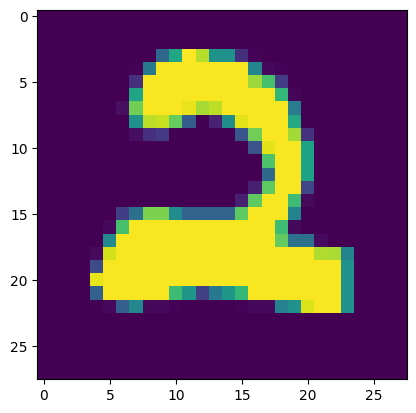

In [ ]:
y_pred = best_model.forward(X=x_train.reshape(-1, 28 * 28))
biggest_loss_indice = torch.argmax(torch.log(y_pred[np.arange(0, N), np.argmax(y_train_oh_, axis=1)]))

x_biggest_loss = x_train.reshape(-1, 28, 28)[biggest_loss_indice]
cmap = plt.get_cmap('gray')
plt.imshow(x_biggest_loss.cpu().detach().numpy())

Slučajno izdvojite 1/5 podataka iz skupa za učenje u skup za validaciju. Tijekom treniranja evaluirajte validacijsku performansu nakon završetka petlje po grupama podataka te na kraju vratite model s najboljom validacijskom performansom (engl. early stopping). Procijenite postignuti utjecaj na konačnu vrijednost funkcije cilja i generalizacijsku performansu.

In [ ]:
def early_stopping(x_train_split, y_train_split, x_val_split, y_val_split):
  y_train_split_oh = data.class_to_onehot(y_train_split)
  y_val_split_oh = data.class_to_onehot(y_val_split)

  model = PTDeep([784, 10], torch.relu)
  model.to(device)

  x_train_split = x_train_split.reshape(x_train_split.shape[0], 28 * 28)
  x_val_split = x_val_split.reshape(x_val_split.shape[0], 28 * 28)

  x_train_split.to(device)
  y_train_split.to(device)
  x_val_split.to(device)
  y_val_split.to(device)

  param_delta, param_lambda = 0.1, 1e-3
  optimizer = optim.SGD(model.parameters(), lr=param_delta, weight_decay=param_lambda)
  losses = []

  every_n_epochs = 500
  improvement_threshold = 20
  last_improvement_cnt = 0
  best_val_acuraccy = 0
  best_model = None
  param_niter = 5000
  epoch_stopped = 0

  # petlja učenja
  for epoch in range(int(param_niter)):
    # ispisujte gubitak tijekom učenja
    # forward prop
    y_train_pred = model.forward(x_train_split)
    #print(y_train_pred.dtype)
    # backward prop
    loss = model.get_loss(y_train_pred, torch.from_numpy(y_train_split_oh).to(device))
    for w in model.weights:
      loss += param_lambda * torch.norm(w)
    losses.append(loss)
    loss.backward()
    # korak optimizacije
    optimizer.step()
    # postavljanje gradijenata na nula
    optimizer.zero_grad()
    if epoch % every_n_epochs == 0:
        print(f'Epoch: {epoch}/{int(param_niter)}, Loss: {loss}')

    y_val_pred = eval(model, x_val_split) # u numpy-u
    val_acuraccy, _, _ = data.eval_perf_multi(np.argmax(y_val_pred, axis=1), y_val_split)

    if val_acuraccy > best_val_acuraccy:
      best_val_acuraccy = val_acuraccy
      best_model = model
      last_improvement_cnt = 0
    else:
      last_improvement_cnt += 1

    if last_improvement_cnt > improvement_threshold:
      epoch_stopped = epoch
      break

  return best_model, best_val_acuraccy, epoch_stopped



In [ ]:
num_examples = x_train.shape[0]
indices = np.random.permutation(num_examples)

x_val_split = x_train[indices[num_examples//5:]]
y_val_split = y_train[indices[num_examples//5:]]
x_train_split = x_train[indices[:num_examples//5]]
y_train_split = y_train[indices[:num_examples//5]]
# print(x_val_split.dtype, y_val_split.dtype, x_train_split.dtype, y_train_split.dtype)
best_val_model, best_val_acuraccy, epoch_stopped = early_stopping(x_train_split, y_train_split, x_val_split, y_val_split)

Epoch: 0/5000, Loss: 2.3025856018066406


/content/drive/My Drive/dubuce/lab1/data.py:132: RuntimeWarning: invalid value encountered in scalar divide
  precision_i = tp_i / (tp_i + fp_i)


Epoch: 500/5000, Loss: 0.39785197377204895


In [ ]:
best_val_acuraccy

0.9018333333333334

Implementirajte stohastički gradijentni spust odnosno postupak učenja po mini-grupama. Prije svake epohe izmiješajte podatke, zatim ih podijelite u n grupa (engl. mini-batch) i onda provedite korak učenja za svaku grupu posebno. Pripazite na to da gubitak karakterizirate tako da ne ovisi o veličini grupe jer je tako lakše interpretirati iznos gubitka te validirati korak učenja. Vaš kod pohranite u metodi train_mb. Procijenite utjecaj na kvalitetu konvergencije i postignutu performansu za najuspješniju konfiguraciju iz prethodnog zadatka. Napomena: u svrhu razumijevanja postupka učenja po mini-grupama, u ovoj vježbi nije dozvoljeno korištenje razreda torch.utils.data.DataLoader.

In [ ]:
def train_mb(X, Yoh_, batch_size=1000, param_niter=500, param_delta=0.1, param_lambda=1e-1, every_n_epochs=50, which_optim='SGD'):
  model = PTDeep([784, 10], torch.relu).to(device)

  X = X.reshape(X.shape[0], 28 * 28)

  optimizer = None
  if which_optim == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=param_delta, weight_decay=param_lambda)
  elif which_optim == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

  num_batches = X.shape[0] // batch_size
  losses = []


  for epoch in range(int(param_niter)):
    epoch_loss = 0
    # mijesanje indeksa
    indices = torch.randperm(X.shape[0])
    X_shuffled = X[indices]
    Yoh_shuffled = Yoh_[indices]

    for mb in range(0, X.shape[0], batch_size):
      # minibatchevi podataka
      X_minibatch = X_shuffled[mb:mb+batch_size].to(device)
      y_minibatch = Yoh_shuffled[mb:mb+batch_size].to(device)

      # forward prop
      y_pred_minibatch = model.forward(X_minibatch)

      # backward prop
      loss = model.get_loss(y_pred_minibatch, y_minibatch)

      for w in model.weights:
        loss += param_lambda * torch.norm(w)

      # korak optimizacije
      loss.backward()

      # postavljanje gradijenata na nulu
      optimizer.zero_grad()
      epoch_loss += loss

    epoch_loss = epoch_loss / num_batches
    if epoch % 100 == 0:
      print(f'Epoch: {epoch}/{int(param_niter)}, Loss: {epoch_loss}')
    losses.append(epoch_loss)

  return losses

In [ ]:
batch_sizes = [1000, 2000, 5000]

losses_bs = []
y_train_oh_ = data.class_to_onehot(y_train)
for batch_size in batch_sizes:
  losses_bs.append(train_mb(x_train, torch.from_numpy(y_train_oh_), batch_size))

Epoch: 0/500, Loss: 2.3025834560394287
Epoch: 100/500, Loss: 2.3025834560394287


KeyboardInterrupt: 

In [ ]:
for i in range(len(losses_bs)):
  plt.plot(np.arange(0, losses_bs[i]), [loss.cpu().detach().numpy() for loss in losses_bs[i]] , label="batchsize="+str(batch_sizes[i]))

Promijenite optimizator u torch.optim.Adam s fiksnim korakom učenja 1e-4. procijenite utjecaj te promjene na kvalitetu konvergencije i postignutu performansu.

In [ ]:
def adam_and_lr_optimizer(x_train, y_train, x_test, y_test, param_delta, lr_scheduler_flag, param_niter):
  y_train_oh = data.class_to_onehot(y_train)
  y_test_oh = data.class_to_onehot(y_test)

  model = PTDeep([784, 10], torch.relu)
  model.to(device)

  x_train = x_train.reshape(x_train.shape[0], 28 * 28)
  x_test = x_test.reshape(x_test.shape[0], 28 * 28)

  x_train.to(device)
  y_train.to(device)
  x_test.to(device)
  y_test.to(device)

  param_lambda = 0 # 1e-3
  optimizer = optim.Adam(model.parameters(), lr=param_delta)
  scheduler = None

  if lr_scheduler_flag is True:
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=1-1e-4)
  losses = []

  every_n_epochs = 100

  # petlja učenja
  for epoch in range(int(param_niter)):
    # ispisujte gubitak tijekom učenja
    # forward prop
    y_train_pred = model.forward(x_train)
    #print(y_train_pred.dtype)
    # backward prop
    loss = model.get_loss(y_train_pred, torch.from_numpy(y_train_oh).to(device))
    for w in model.weights:
      loss += param_lambda * torch.norm(w)
    losses.append(loss)
    loss.backward()
    # korak optimizacije
    optimizer.step()
    # postavljanje gradijenata na nula
    optimizer.zero_grad()
    if lr_scheduler_flag is True:
      scheduler.step()
    if epoch % every_n_epochs == 0:
        print(f'Epoch: {epoch}/{int(param_niter)}, Loss: {loss}')

  return losses



In [ ]:
losses_wo_scheduler = adam_and_lr_optimizer(x_train, y_train, x_test, y_test, 1e-4, False, 1000)

Epoch: 0/1000, Loss: 2.3025853633880615
Epoch: 100/1000, Loss: 1.8521111011505127
Epoch: 200/1000, Loss: 1.520229458808899
Epoch: 300/1000, Loss: 1.2814512252807617
Epoch: 400/1000, Loss: 1.1090571880340576
Epoch: 500/1000, Loss: 0.9817748069763184
Epoch: 600/1000, Loss: 0.8851025104522705
Epoch: 700/1000, Loss: 0.8096250295639038
Epoch: 800/1000, Loss: 0.7492254376411438
Epoch: 900/1000, Loss: 0.699852705001831


In [ ]:
losses_w_scheduler = adam_and_lr_optimizer(x_train, y_train, x_test, y_test, 1e-4, True, 1000)

Epoch: 0/1000, Loss: 2.3025853633880615
Epoch: 100/1000, Loss: 1.8540289402008057
Epoch: 200/1000, Loss: 1.5257747173309326
Epoch: 300/1000, Loss: 1.2903369665145874
Epoch: 400/1000, Loss: 1.1204725503921509
Epoch: 500/1000, Loss: 0.995011031627655
Epoch: 600/1000, Loss: 0.8996534943580627
Epoch: 700/1000, Loss: 0.825145959854126
Epoch: 800/1000, Loss: 0.7654810547828674
Epoch: 900/1000, Loss: 0.7166780233383179


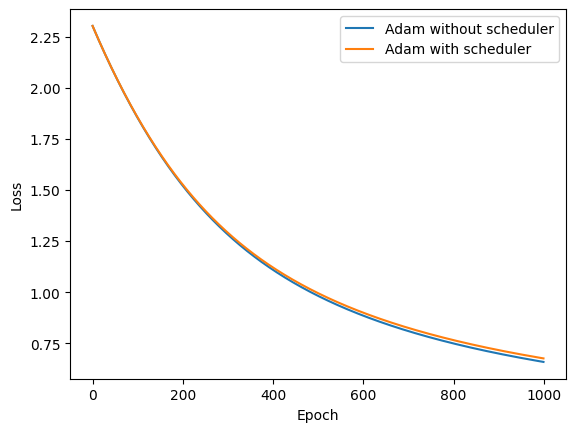

In [ ]:
plt.plot(np.arange(0, len(losses_wo_scheduler)), [loss.cpu().detach().numpy() for loss in losses_wo_scheduler], label="Adam without scheduler")
plt.plot(np.arange(0, len(losses_w_scheduler)), [loss.cpu().detach().numpy() for loss in losses_w_scheduler], label="Adam with scheduler")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Izračunajte i interpretirajte gubitak slučajno incijaliziranog modela (dakle, modela koji nije vidio podatke za učenje).

In [ ]:
randomly_inizialized_model = PTDeep([784, 100, 10], torch.relu)

y_pred_random = eval(randomly_inizialized_model, x_train.reshape(x_train.shape[0], 28 * 28))
y_pred_random_tensor = torch.from_numpy(y_pred_random)


print(f'{randomly_inizialized_model.get_loss(y_pred_random_tensor, torch.tensor(y_train_oh_))}')

print(f'np.log(0.1)={np.log(0.1)}')

2.3025853633880615
np.log(0.1)=-2.3025850929940455


Naučite linearni i jezgreni SVM uz pomoć modula sklearn.svm. Koristite podrazumijevano one vs one proširenje SVM-a za klasificiranje podataka u više razreda. Pri eksperimentiranju budite strpljivi jer bi učenje i evaluacija mogli trajati više od pola sata. Usporedite dobivenu performansu s performansom dubokih modela.

In [ ]:
def train_linear_rbf_SVM_MNIST(x_train, y_train):
  X = x_train.reshape(x_train.shape[0], 28 * 28)

  linear_model =  SVC(C=1, kernel='linear', decision_function_shape='ovo').fit(X, y_train)
  rbf_model = SVC(C=1, kernel='rbf', decision_function_shape='ovo').fit(X, y_train)


  return linear_model, rbf_model

In [ ]:
linear_model, rbf_model = train_linear_rbf_SVM_MNIST(x_train, y_train)

In [ ]:
y_pred_lin = linear_model.predict(x_test.reshape(x_test.shape[0], 28 * 28))

In [ ]:
acuraccy, precision, M = data.eval_perf_multi(y_pred_lin, y_test)

print(f'acuraccy:{acuraccy}')
print(f'precision:{precision}')
print(f'conf. matrix:{M}')

acuraccy:0.9792
precision:[(0.9928571428571429, 0.9798590130916415), (0.9920704845814978, 0.9885864793678666), (0.9748062015503876, 0.9757516973811833), (0.9851485148514851, 0.9745347698334965), (0.9786150712830958, 0.9826175869120655), (0.976457399103139, 0.986409966024915), (0.9853862212943633, 0.9853862212943633), (0.9688715953307393, 0.9755142017629774), (0.9753593429158111, 0.9713701431492843), (0.9613478691774033, 0.9719438877755511)]
conf. matrix:[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


In [ ]:
pred_rbf = rbf_model.predict(x_test.reshape(x_test.shape[0], 28 * 28))

In [ ]:
acuraccy, precision, M = data.eval_perf_multi(pred_rbf, y_test)

print(f'acuraccy:{acuraccy}')
print(f'precision:{precision}')
print(f'conf. matrix:{M}')

acuraccy:0.9404
precision:[(0.976530612244898, 0.9522388059701492), (0.9885462555066079, 0.9697493517718236), (0.937015503875969, 0.9253588516746412), (0.9376237623762376, 0.9062200956937799), (0.9592668024439919, 0.9363817097415507), (0.9002242152466368, 0.9145785876993167), (0.9498956158663883, 0.9568874868559412), (0.9309338521400778, 0.9522388059701492), (0.9004106776180698, 0.936965811965812), (0.9137760158572844, 0.948559670781893)]
conf. matrix:[[ 957    0    4    1    1    6    9    1    0    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   8    6  967   11    3    3    7    8   17    2]
 [   4    3   16  947    1   16    0    9   12    2]
 [   1    1   10    1  942    2    4    2    3   16]
 [  10    4    3   36    6  803   13    1   14    2]
 [   9    2   13    1    5   16  910    1    1    0]
 [   1    8   21   10    8    1    0  957    3   19]
 [   8    4    6   25    7   26    6    7  877    8]
 [   7    7    2   11   33    4    0   18    5  922]]


**8. Normalizacija po podatcima (bonus)**
